In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:

# Load CSV file
df = pd.read_csv(r"D:\BE\LPV\fashion-mnist_train.csv")

In [4]:
# Split features and labels
y = df['label'].values
X = df.drop('label', axis=1).values

In [5]:
# Normalize and reshape the input
X = X / 255.0
X = X.reshape(-1, 28, 28, 1)


In [6]:
# Split into train and test sets manually (since CSV only has train data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Class names (as in original Fashion MNIST)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])


C:\Users\vipul\jupyter_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7605 - loss: 0.6620 - val_accuracy: 0.8659 - val_loss: 0.3672
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8791 - loss: 0.3411 - val_accuracy: 0.8849 - val_loss: 0.3077
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8963 - loss: 0.2845 - val_accuracy: 0.8878 - val_loss: 0.2990
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9119 - loss: 0.2408 - val_accuracy: 0.8974 - val_loss: 0.2753
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9212 - loss: 0.2136 - val_accuracy: 0.9075 - val_loss: 0.2566
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9333 - loss: 0.1788 - val_accuracy: 0.9049 - val_loss: 0.2647
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9400 - loss: 0.1639 - val_accuracy: 0.9090 - val_loss: 0.2566
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9491 -

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


375/375 - 2s - 4ms/step - accuracy: 0.9093 - loss: 0.2829

Test accuracy: 0.9093


In [12]:
# Predict on test images
predictions = model.predict(X_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


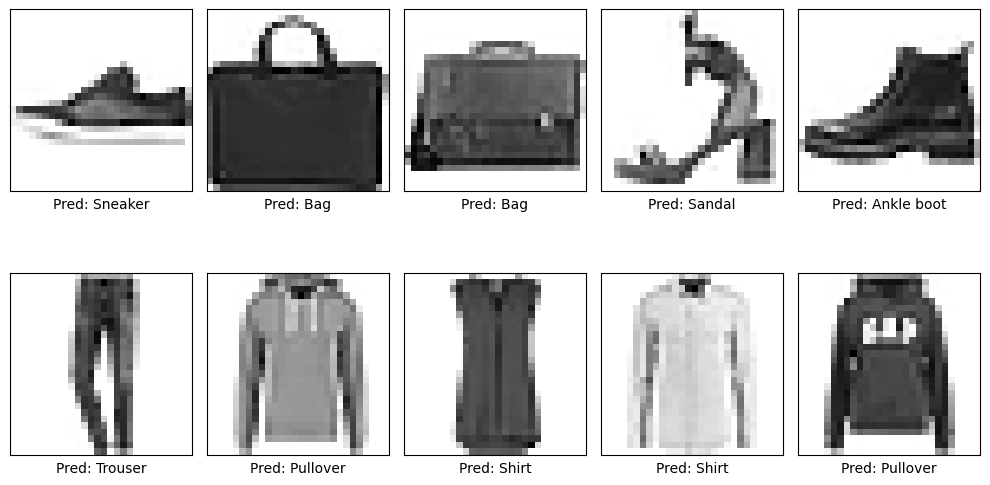

In [13]:
# Plot some predictions
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predictions[i].argmax()]}")
plt.tight_layout()
plt.show()

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))    
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9671 - loss: 0.0893 - val_accuracy: 0.9053 - val_loss: 0.2995
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9706 - loss: 0.0799 - val_accuracy: 0.9044 - val_loss: 0.3402
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9750 - loss: 0.0674 - val_accuracy: 0.9040 - val_loss: 0.3397
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9779 - loss: 0.0587 - val_accuracy: 0.9023 - val_loss: 0.3788
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9813 - loss: 0.0521 - val_accuracy: 0.9048 - val_loss: 0.3984
Epoch 6/10
1499/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9832 - loss: 0.0461